https://www.datamanim.com/dataset/03_dataq/diamondQuestion.html

# Question 1
carat과 price의 경향을 비교하기 위한 scatterplot그래프를 출력하시오

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
data=pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/diamonds.csv',index_col=0)

In [2]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


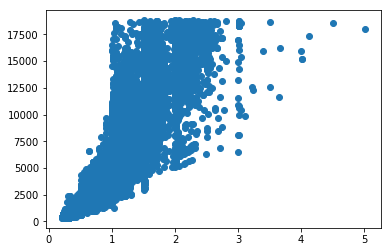

In [4]:
import matplotlib.pyplot as plt
plt.scatter(data=data, x='carat', y='price')

# Question 2
carat과 price사이의 상관계수와 상관계수의 p-value값은?

In [5]:
corr=data.corr().iloc[0,3]
corr

0.9215913011934687

In [6]:
from scipy import stats
corr, pv=stats.pearsonr(data.carat, data.price)

In [7]:
corr

0.9215913011935015

In [8]:
pv

0.0

# Question 3
Diamond의 평균가격은 3932로 알려져있다. ‘H’ color를 가지는 다이아몬드 집단의 평균에 대한 일표본 t검정을 시행하려한다. 통계량과 pvalue값을 구하시오. 유의수준 0.05에서 귀무가설 채택여부를 boolean 값으로 표현할 변수(hypo) 만들고 출력하시오

In [9]:
H_prop=data[data.color=='H']
static,pv=stats.ttest_1samp(H_prop.price, 3932)

if pv<0.05:
    hypo=False
else:
    hypo=True

In [10]:
print(f"{static}\n{pv}\n{hypo}")

11.988997411117696
7.569973305218302e-33
False


그래프상에서 ‘F’와 ‘G’는 평균이 유사해보인다.이를 확인하기 위해 집단간 등분산(levene,fligner,bartlett) 검정을 시행 후 결과를 출력하고조건에 맞는 독립표본 t검정을 시행하라

In [12]:
F=data[data.color=='F']
G=data[data.color=='G']

leve=stats.levene(F.price, G.price)
fli=stats.fligner(F.price, G.price)
bartlet=stats.bartlett(F.price, G.price)

In [13]:
print(leve)
print(fli)
print(bartlet)

LeveneResult(statistic=53.627886257416655, pvalue=2.511093007074788e-13)
FlignerResult(statistic=37.04347553879807, pvalue=1.155244880009172e-09)
BartlettResult(statistic=47.52732212008511, pvalue=5.424264079418252e-12)


In [18]:
statistic, pvalue=stats.ttest_ind(G.price, F.price, equal_var=False)

In [19]:
print(f"{statistic}\n{pvalue}")

5.045279980436125
4.567032122704146e-07


color ‘F’,’G’,’D’ 세집단의 price값들에 대해 anova분석을 시행하라.

In [22]:
F=data[data.color=='F']
G=data[data.color=='G']
D=data[data.color=='D']

leve=stats.levene(F.price,G.price,D.price)
fli=stats.fligner(F.price,G.price,D.price)
bartlet=stats.bartlett(F.price,G.price,D.price)

In [23]:
print(leve)
print(fli)
print(bartlet)

LeveneResult(statistic=118.97521469312785, pvalue=3.557425577381817e-52)
FlignerResult(statistic=494.6459169558573, pvalue=3.881538382653629e-108)
BartlettResult(statistic=289.1436443252346, pvalue=1.6340125811454025e-63)


In [28]:
anova = stats.f_oneway(F['price'], D['price'], G['price'])

In [29]:
anova

F_onewayResult(statistic=101.1811790316069, pvalue=1.6513790091285713e-44)

# Question 4
연속형 변수(carat,depth,table,price,x,y,z) 각각의 이상치(1,3분위값에서 IQR*1.5 외의 값) 갯수를 데이터 프레임(변수명 ratio_df, 비율의 내림차순 정렬)으로 아래와 같이 나타내어라.

In [39]:
cont_var=['carat','depth','table','price','x','y','z']
ratio=[]
for var in cont_var:
    Q1=data[var].quantile(0.25)
    Q3=data[var].quantile(0.75)
    IQR=Q3-Q1
    ratio.append(len(data[(data[var]>Q3+1.5*IQR)|(data[var]<Q1-1.5*IQR)]))
ratio

[1889, 2545, 605, 3540, 32, 29, 49]

In [45]:
result=pd.DataFrame({'column':cont_var,'ratio': ratio}).sort_values(by='ratio',ascending=False)
result

,column,ratio
3,price,3540
1,depth,2545
0,carat,1889
2,table,605
6,z,49
4,x,32
5,y,29


# Question 5
color에 따른 price의 max, min, 평균값을 colorDf 변수에 저장하고 아래와 같이 출력하는 코드를 작성하라

In [52]:
colorDf=data.groupby('color').price.agg(['max','min','mean'])
colorDf

,max,min,mean
color,,,
D,18693,357,3169.954096
E,18731,326,3076.752475
F,18791,342,3724.886397
G,18818,354,3999.135671
H,18803,337,4486.669196
I,18823,334,5091.874954
J,18710,335,5323.818020


# Question 6
전체 데이터중 color의 발생빈도수에 따라 labelEncoding(빈도수 적은것 : 1, 빈도수 증가할수록 1씩증가)을 하고 colorLabel 컬럼에 저장하고 cut에 따른 colorLabel의 평균값을 구하여라

In [62]:
dic={x:i+1 for i, x in enumerate(data.groupby('color').size().sort_values().index)}
data['colorLabel']=data.color.map(lambda x : dic[x])

In [65]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,colorLabel
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,6
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,6
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,6
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1


In [71]:
data.groupby(['cut'])[['colorLabel']].mean()

,colorLabel
cut,
Fair,4.516770
Good,4.562780
Ideal,4.769152
Premium,4.644913
Very Good,4.654362


# Question 7
price의 값에 따른 구간을 1000단위로 나누고 priceLabel 컬럼에 저장하라. 저장시 숫자 순으로 label하고(0이상 1000미만 : 0,1000이상 2000미만 :1 …) 최종적으로 구간별 갯수(변수명:labelCount)를 출력하라

In [88]:
data['priceLabel']=data.price//1000
result=pd.DataFrame(data.groupby('priceLabel').size())
result

,0
priceLabel,
0,14499
1,9704
2,6131
3,4226
4,4653
5,3174
6,2278
7,1669
8,1307


In [89]:
result.reset_index(inplace=True)
result.columns=['priceLable','counts']

In [90]:
result

,priceLable,counts
0,0,14499
1,1,9704
2,2,6131
3,3,4226
4,4,4653
5,5,3174
6,6,2278
7,7,1669
8,8,1307
9,9,1076
